### Problem 1: counting words with mrjob

4. Zipf's law states, roughly, that if one plots word frequency against frequency rank

In [1]:
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from sklearn import linear_model
import itertools

with open("darwin_word_counts.txt", "r") as file:
    f = file.read().split('\t')

count = sorted([int(i.split('\n')[0]) for i in f[1:]])[::-1]

rank = [j for j in range(1,len(count)+1)]
for i in range(len(count)):
    if count[i] == count[i-1]:
        rank[i] = rank[i-1]

In [3]:
with PdfPages('zipf.pdf') as pdf:
    plt.loglog(rank, count)
    plt.xlabel('Frequency Rank')
    plt.ylabel('Word Frequency')
    plt.title('Word Frequency Against Frequency Rank with log-log scale')
    pdf.savefig()
    plt.close()

5. How "Zipfian" does the resulting plot look (It suffices for you to state whether or not your plot looks approximately like a line)?

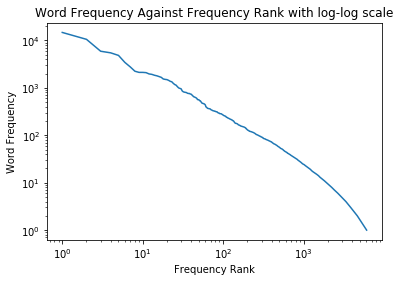

In [5]:
plt.loglog(rank, count)
plt.xlabel('Frequency Rank')
plt.ylabel('Word Frequency')
plt.title('Word Frequency Against Frequency Rank with log-log scale')
plt.show()

#### Our plot looks approximately like a line.

### Problem 2: Computing Sample Statistics with mrjob

3. Include in your notebook file a copy-paste of your shell session on Fladoop in a markdown cell (i.e., a cell that will display as code but will not be executed by the interpreter).

#### python mr_summary_stats.py -r hadoop hdfs:///var/stats507w19/populations_large.txt > summar y_large.txt

4. Use matplotlib and the results in summary large.txt to create a plot displaying 95% confidence intervals for the sample means of the populations given by the class labels in file hdfs:/var/stats507w19/populations large.txt. You will probably want to make a boxplot for this, but feel free to get creative if you think you have a better way to display the information. Make sure your plot has a sensible title and axis labels. Save your plot as a pdf called populations.pdf and include it in your submission.

In [2]:
find_4_tuples = re.compile(r"[-0-9.]+\"\t\[[-0-9.]+\,[-0-9.]+\,[-0-9.]+\]")
find_num = re.compile(r"[-0-9.]+")
with open("summary_large.txt", "r") as file:
    f = file.read()
value = sorted([[int(find_num.findall(i)[0]), float(find_num.findall(i)[1]),\
               float(find_num.findall(i)[2]),float(find_num.findall(i)[3])]\
                for i in find_4_tuples.findall(f)])

In [10]:
label = [i[0] for i in value]
yerror = [1.96*np.sqrt(i[3])/np.sqrt(i[1]) for i in value]
mean = [float(i[2]) for i in value]

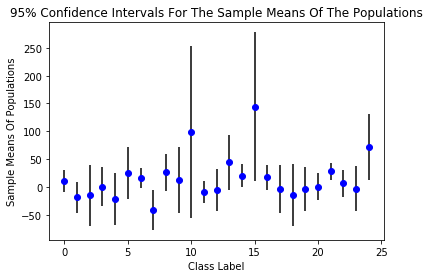

In [25]:
plt.errorbar(label, mean, yerr = yerror, fmt = 'bo', ecolor = 'black')
plt.xlabel('Class Label')
plt.ylabel('Sample Means Of Populations')
plt.title('95% Confidence Intervals For The Sample Means Of The Populations')
plt.show()

In [26]:
with PdfPages('populations.pdf') as pdf:
    plt.errorbar(label, mean, yerr = yerror, fmt = 'bo', ecolor = 'black')
    plt.xlabel('Class Label')
    plt.ylabel('Sample Means Of Populations')
    plt.title('95% Confidence Intervals For The Sample Means Of The Populations')
    pdf.savefig()
    plt.close()

### Problem 3: Graph Processing: Counting Triangles with PySpark

3. include in your notebook file a copy-paste of the commands you used to launch your job along with their outputs.

#### spark-submit --master yarn --queue stats507w19 ps_fof.py hdfs:/var/stats507w19/fof/friends1000/* hw8

#### hdfs dfs -cat hw8/* > ./big_triangle_list.txt

In [3]:
np.exp(-5)

0.006737946999085467